In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
%matplotlib inline

#local imports
from detection_rate_main import detection_rate_main
from utils.mbhbinaries import MagicMergers, EvolveFDFA

## Declare Resample Parameters

In [20]:
num_catalogs = 10000
t_obs = 10.0 #years
duration = 100.0 #years

#input file
fp = '../data_ready_june_snap_lim_1.txt'

##################
###### KDE #######
##################

# what key for the input data for m1, m2. It is not
# needed for z because we calculate z_coalescence. 
kde_key_guide = OrderedDict()
kde_key_guide['m1'] = 'mass_new_prev_in'
kde_key_guide['m2'] = 'mass_new_prev_out'
#kde_key_guide['z'] = 'redshift'

########################
###### Evolution #######
########################

# evolve with Dosopoulou and Antonini 2017
evolve_class = EvolveFDFA
# keys are the parameter names for the evolution scenario. 
# values are the corresponding names of the input_data columns
evolve_key_guide = {'m1':'mass_new_prev_in', 'm2':'mass_new_prev_out', 
                    'z':'redshift', 'separation':'separation', 'gamma':'gamma', 
                    'vel_disp_1':'vel_disp_prev_in',  'vel_disp_2':'vel_disp_prev_out'}


# magic mergers
#evolve_key_guide = {'z':'redshift'}
#evolve_class = MagicMergers

###########################
###### merger rate  #######
###########################

# kwargs related to merger rate calculation
merger_rate_kwargs = {'Vc':106.5**3, 'dz':0.001, 'zmax':10.0}

############################################
###### Parrallel Calculation of SNRs #######
############################################
parallel_kwargs = {'num_processors':None, 'num_splits':1000, 'verbose':10}

## Run the Resampler

In [21]:
# only_detectable and snr_threshold are optional kwargs.
# only_detectable defaults to False which makes snr_threshold meaningless
# only_detectable True means the binaries returned have an SNR over the threshold
cats = detection_rate_main(num_catalogs, t_obs, duration, fp,
                            evolve_key_guide, kde_key_guide, evolve_class,
                            merger_rate_kwargs, parallel_kwargs, 
                            only_detectable=True, snr_threshold=8.0)

merger rate: 0.6194962953593661
numprocs 4
start pool with 4 processors: 619 total processes.

Start process: 9
Start process: 19
Start process: 29
Start process: 39
Start process: 49
Start process: 59
Start process: 69
Start process: 79
Start process: 89
Start process: 99
Start process: 109
Start process: 119
Start process: 129
Start process: 139
Start process: 149
Start process: 159
Start process: 169
Start process: 179
Start process: 189
Start process: 199
Start process: 209
Start process: 219
Start process: 229
Start process: 239
Start process: 249
Start process: 259
Start process: 269
Start process: 279
Start process: 289
Start process: 299
Start process: 309
Start process: 319
Start process: 329
Start process: 339
Start process: 349
Start process: 359
Start process: 369
Start process: 379
Start process: 389
Start process: 399
Start process: 409
Start process: 419
Start process: 429
Start process: 439
Start process: 449
Start process: 459
Start process: 469
Start process: 479
Star

/Users/michaelkatz/Documents/Research/Illustris/MCproject/paper/code/detection_rate_main.py:79: RuntimeWarning: invalid value encountered in greater
  inds_keep = np.where(snr>8.0)[0]


In [22]:
cats.dtype

dtype((numpy.record, [('cat', '<i8'), ('t_event', '<f8'), ('m1', '<f8'), ('m2', '<f8'), ('z_coal', '<f8'), ('snr', '<f8')]))

Text(0.5,0,'$\\log_{10}{\\rho}$')

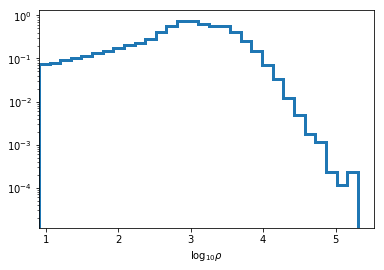

In [26]:
plt.hist(np.log10(cats['snr']), bins=30, histtype='step', lw=3, log=True, density=True)
plt.xlim(np.log10(8),)
plt.xlabel(r'$\log_{10}{\rho}$')